# Only focus on VIP network (Top 10 alters network)

In [1]:
import numpy as np
import pandas as pd
import meetup_strategy as ms
import time 
import util
import pickle
%load_ext autoreload
%autoreload 2

In [2]:
checkin_path = 'data/brightkite_checkins.csv'
placeid_path = 'temp_data/bk-150/brightkite_placeidT_150.pickle'
friendship_path = 'data/brightkite_friends.csv'
VIP_network_path = 'final/bk-150/bk_VIP_MeetupNp.csv'

In [3]:
VIP_network = pd.read_csv(VIP_network_path)

In [4]:
# read picle file
pickle_in = open(placeid_path, "rb")
placeidT = pickle.load(pickle_in)
pickle_in.close()

In [9]:
VIP_H_MFN = VIP_network[VIP_network['category'] == 'CB-1H-MFN'][['userid', 'userid_y']]

## H-MFN

In [10]:
VIP_H_MFN.columns = ['userid_x', 'userid_y']
VIP_H_MFN['userid_x'] = VIP_H_MFN['userid_x'].astype(int)
VIP_H_MFN['userid_y'] = VIP_H_MFN['userid_y'].astype(int)

In [11]:
VIP_H_MFN

,userid_x,userid_y
0,0,2
1,0,30
2,0,35
3,0,29
4,0,40
...,...,...
655,10348,11918
656,10348,10375
657,10348,10458
658,10348,15815


In [12]:
ValidGoodMeetupCV = ms.MeetupCrossValid(checkin_path, mins_records=150, name='bk_H_cv_vip10',freq='H',
                            n_previous=None, user_meetup=None, total_meetup=VIP_H_MFN, placeidT=placeidT)

In [13]:
len(ValidGoodMeetupCV.egolist)

66

In [14]:
ValidGoodMeetupCV.ego_info(n_shown=False, verbose=True, filesave=True)

0
2
3
7
11
12
13
17
21
23
29
30
35
36
37
41
42
45
47
49
52
67
68
69
75
115
167
189
195
214
215
295
362
364
389
652
654
659
678
703
824
836
900
959
969
1033
1087
1140
1142
1156
1160
1164
1168
1499
1505
1515
1523
1861
1895
1898
2030
2880
4612
6910
7170
10348


,Included,alters_names,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,Pi_alters_ratio,Pi_ego_alters_ratio,userid
0,1,'2',7.027791,4.956037,0.342498,0.572013,0.618957,1.033735,0
1,1,'30',7.273598,4.932492,0.312669,0.574440,0.565051,1.038120,0
2,1,'35',8.110979,5.037324,0.204618,0.563609,0.369783,1.018547,0
3,1,'29',8.484623,5.083876,0.151754,0.558777,0.274247,1.009814,0
4,1,'40',7.846641,5.061098,0.240003,0.561143,0.433730,1.014090,0
...,...,...,...,...,...,...,...,...,...
1018,9,"'10430','10332','10371','2842','11918','10375'...",5.183241,3.981147,0.554213,0.673524,0.899286,1.092883,10348
1019,9,"'10430','10332','10380','2842','11918','10375'...",5.235216,4.004108,0.548856,0.671324,0.890593,1.089314,10348
1020,9,"'10430','10371','10380','2842','11918','10375'...",5.224296,4.001964,0.549983,0.671530,0.892421,1.089648,10348
1021,9,"'10332','10371','10380','2842','11918','10375'...",5.411614,4.044249,0.530543,0.667472,0.860878,1.083064,10348


## TFN

In [15]:
VIP_TFN = VIP_network[VIP_network['category'] == 'TFN'][['userid', 'userid_y']]

In [16]:
VIP_TFN.columns = ['userid_x', 'userid_y']
VIP_TFN['userid_x'] = VIP_TFN['userid_x'].astype(int)
VIP_TFN['userid_y'] = VIP_TFN['userid_y'].astype(int)

In [17]:
TFN_vip_meetup = ms.MeetupCrossValid(checkin_path, mins_records=150, name='bk_TFN_cv_vip10',freq='H',
                            n_previous=None, user_meetup=None, total_meetup=VIP_TFN, placeidT=placeidT)

In [18]:
len(TFN_vip_meetup.egolist)

66

In [19]:
TFN_vip_meetup.ego_info(n_shown=False, verbose=True, filesave=True)

0
2
3
7
11
12
13
17
21
23
29
30
35
36
37
41
42
45
47
49
52
67
68
69
75
115
167
189
195
214
215
295
362
364
389
652
654
659
678
703
824
836
900
959
969
1033
1087
1140
1142
1156
1160
1164
1168
1499
1505
1515
1523
1861
1895
1898
2030
2880
4612
6910
7170
10348


,Included,alters_names,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,Pi_alters_ratio,Pi_ego_alters_ratio,userid
0,1,'2',7.027791,4.956037,0.342498,0.572013,0.618957,1.033735,0
1,1,'30',7.273598,4.932492,0.312669,0.574440,0.565051,1.038120,0
2,1,'35',8.110979,5.037324,0.204618,0.563609,0.369783,1.018547,0
3,1,'29',8.484623,5.083876,0.151754,0.558777,0.274247,1.009814,0
4,1,'40',7.846641,5.061098,0.240003,0.561143,0.433730,1.014090,0
...,...,...,...,...,...,...,...,...,...
1018,9,"'10375','10344','2819','1446','2850','10690','...",6.401174,4.257195,0.423802,0.646882,0.687677,1.049653,10348
1019,9,"'10375','10344','10612','1446','2850','10690',...",6.567387,4.313675,0.405136,0.641377,0.657388,1.040720,10348
1020,9,"'10375','2819','10612','1446','2850','10690','...",7.000431,4.346465,0.355347,0.638172,0.576599,1.035520,10348
1021,9,"'10344','2819','10612','1446','2850','10690','...",6.591645,4.321541,0.402392,0.640608,0.652936,1.039474,10348


# Compare and visualisation

In [20]:
TFN_vip = TFN_vip_meetup.cross_info.copy()
H_MFN_vip = ValidGoodMeetupCV.cross_info.copy()

In [21]:
TFN_vip['category'] = 'TFN'
H_MFN_vip['category'] = 'CB-1H-MFN'

In [22]:
import visualization as vs

In [23]:
vip_meetup = pd.concat([H_MFN_vip, TFN_vip])

In [25]:
# vip_meetup.to_csv('final/bk-150-cv/bk_join_vip10_CV_MeetupNp.csv', index=False)

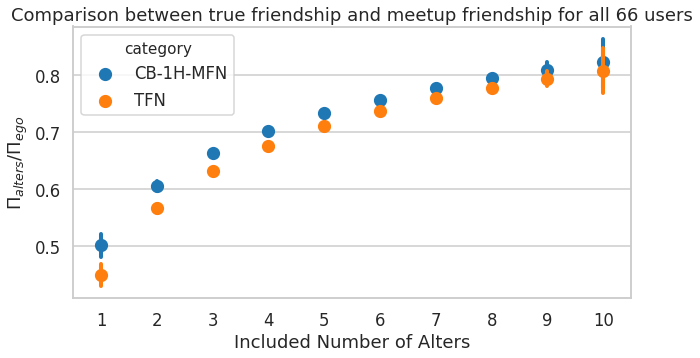

In [24]:
vs.cv_compare_plot(vip_meetup, threshold=10, mode='talk', l=10, w=5)